# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing 

# IMPORTING DATA

In [2]:
# load dataset
df = pd.read_csv('dataset.csv')


In [3]:
df # YES=2 , NO=1.

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2         2         2         1                  1   
2                  1         2         1         2                  1   
3                  1         1         1         1                  2   
4                  1         1         1         2                  1   
..               ...       ...       ...       ...                ...   
304                2         2         1         1                  2   
305                1         2         2         2                  2   
306                1         1         2         2                  2   
307                1         2         2         1                  2   
308                1         2         2         2                  2   

     COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  \
0           2                    2                      2           2   
1           1                    2                      2           2   
2           2                    2                      1           2   
3           1                    1                      2           2   
4           2                    2                      1           1   
..        ...                  ...                    ...         ...   
304         2                    2                      2           1   
305         2                    2                      1           2   
306         2                    1                      1           2   
307         2                    2                      1           2   
308         1                    1                      2           1   

    LUNG_CANCER  
0           YES  
1           YES  
2            NO  
3            NO  
4            NO  
..          ...  
304         YES  
305         YES  
306         YES  
307         YES  
308         YES  

[309 rows x 16 columns]

# DATA CONTROLLING

In [4]:
df.head()#This code is used to see the first 5 rows of the data set

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      2           2         YES  
1                    2                      2           2         YES  
2                    2                      1           2          NO  
3                    1                      2           2          NO  
4                    2                      1           1          NO

In [5]:
df.tail()#This code is used to see the last 5 rows of the data set

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
304                2         2         1         1                  2   
305                1         2         2         2                  2   
306                1         1         2         2                  2   
307                1         2         2         1                  2   
308                1         2         2         2                  2   

     COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  \
304         2                    2                      2           1   
305         2                    2                      1           2   
306         2                    1                      1           2   
307         2                    2                      1           2   
308         1                    1                      2           1   

    LUNG_CANCER  
304         YES  
305         YES  
306         YES  
307         YES  
308         YES

In [6]:
df.info()#This code is used to see the properties and attributes of the parameters in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [7]:
df.describe()

AGE     SMOKING  YELLOW_FINGERS     ANXIETY  PEER_PRESSURE  \
count  309.000000  309.000000      309.000000  309.000000     309.000000   
mean    62.673139    1.563107        1.569579    1.498382       1.501618   
std      8.210301    0.496806        0.495938    0.500808       0.500808   
min     21.000000    1.000000        1.000000    1.000000       1.000000   
25%     57.000000    1.000000        1.000000    1.000000       1.000000   
50%     62.000000    2.000000        2.000000    1.000000       2.000000   
75%     69.000000    2.000000        2.000000    2.000000       2.000000   
max     87.000000    2.000000        2.000000    2.000000       2.000000   

       CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  ALCOHOL CONSUMING  \
count       309.000000  309.000000  309.000000  309.000000         309.000000   
mean          1.504854    1.673139    1.556634    1.556634           1.556634   
std           0.500787    0.469827    0.497588    0.497588           0.497588   
min           1.000000    1.000000    1.000000    1.000000           1.000000   
25%           1.000000    1.000000    1.000000    1.000000           1.000000   
50%           2.000000    2.000000    2.000000    2.000000           2.000000   
75%           2.000000    2.000000    2.000000    2.000000           2.000000   
max           2.000000    2.000000    2.000000    2.000000           2.000000   

         COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  
count  309.000000           309.000000             309.000000  309.000000  
mean     1.579288             1.640777               1.469256    1.556634  
std      0.494474             0.480551               0.499863    0.497588  
min      1.000000             1.000000               1.000000    1.000000  
25%      1.000000             1.000000               1.000000    1.000000  
50%      2.000000             2.000000               1.000000    2.000000  
75%      2.000000             2.000000               2.000000    2.000000  
max      2.000000             2.000000               2.000000    2.000000

In [8]:
df.columns#This code is used to see the names of the parameters of the data set

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [9]:
df['LUNG_CANCER']

0      YES
1      YES
2       NO
3       NO
4       NO
      ... 
304    YES
305    YES
306    YES
307    YES
308    YES
Name: LUNG_CANCER, Length: 309, dtype: object

In [10]:
df.describe(include='object')

GENDER LUNG_CANCER
count     309         309
unique      2           2
top         M         YES
freq      162         270

# DATA VISUALIZATION

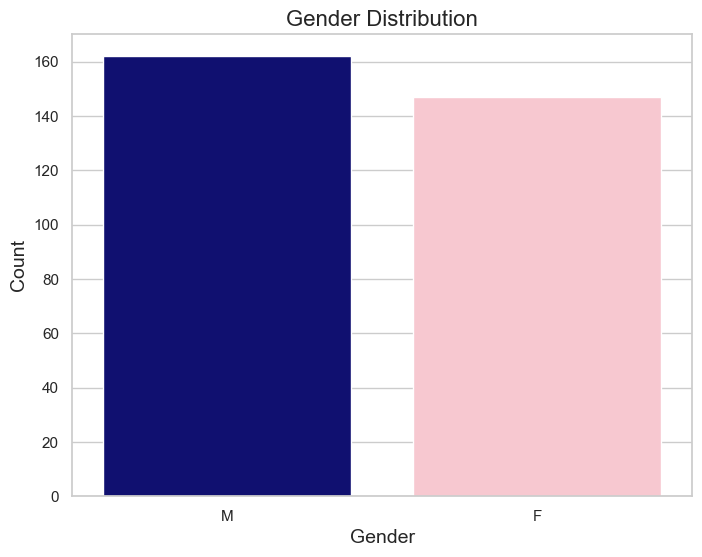

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))  # Size of the plot

# Creating a bar plot for gender data
sns.countplot(x='GENDER', data=df, palette={"M": "navy", "F": "pink"})

# Axis labels and plot title
plt.xlabel('Gender', fontsize=14)  # X-axis label
plt.ylabel('Count', fontsize=14)  # Y-axis label
plt.title('Gender Distribution', fontsize=16)  # Plot title
plt.show()

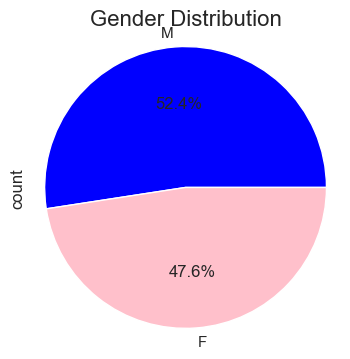

In [12]:
plt.figure(figsize=(4, 4))  # Size of the plot
# Counting the gender values and plotting them as a pie chart
colors = ['blue', 'pink']
# Blue for male, pink for female
df['GENDER'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors)
# Setting the aspect ratio to be equal, ensuring the pie chart is circular
plt.axis('equal')
# Adding a title
plt.title('Gender Distribution', fontsize=16)
# Display the pie chart
plt.show()

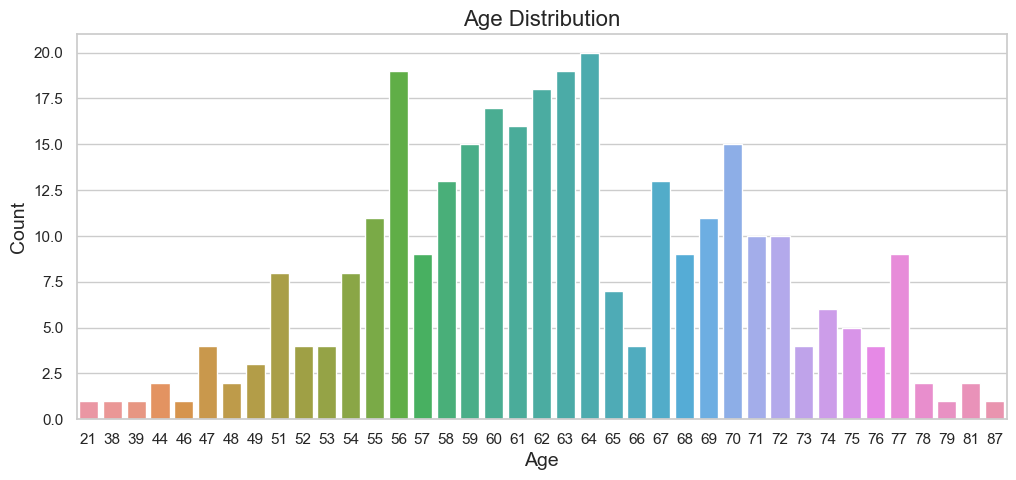

In [13]:
plt.figure(figsize=(12,5))
sns.countplot(x='AGE', data=df)
plt.xlabel('Age', fontsize=14)  # X-axis label
plt.ylabel('Count', fontsize=14)  # Y-axis label
plt.title('Age Distribution', fontsize=16)  # Plot title

# Display the plot
plt.show()






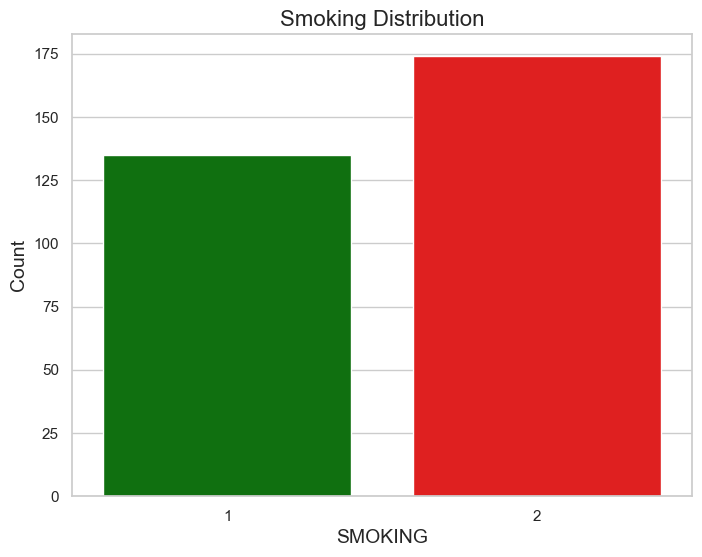

In [14]:
plt.figure(figsize=(8, 6))  # Size of the plot

# Creating a count plot for 'SMOKING' data with red color for 2s and green color for 1s
sns.countplot(x='SMOKING', data=df, palette={1: 'green', 2: 'red'})

# Adding labels to the axes and a title to the plot
plt.xlabel('SMOKING', fontsize=14)  # X-axis label
plt.ylabel('Count', fontsize=14)  # Y-axis label
plt.title('Smoking Distribution', fontsize=16)  # Plot title
sns.set(style="whitegrid", rc={"axes.facecolor": "white", "grid.color": "#FFFFFF"})
# Display the plot
plt.show()

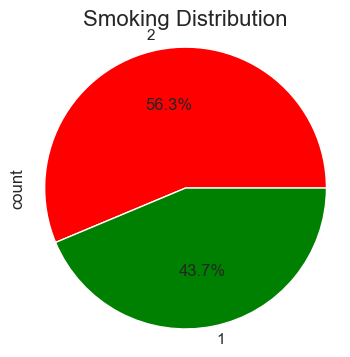

In [15]:
plt.figure(figsize=(4, 4))  # Size of the plot

# Define colors for the pie chart (red for 2, green for 1)
colors = ['red', 'green']

# Creating a pie chart for 'SMOKING' data with specified colors
df['SMOKING'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors)

# Setting the aspect ratio to be equal, ensuring the pie chart is circular
plt.axis('equal')

# Adding a title
plt.title('Smoking Distribution', fontsize=16)

# Display the pie chart
plt.show()




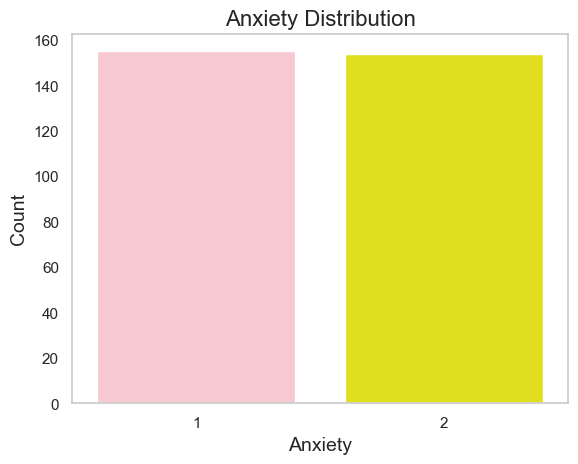

In [16]:

# Creating a count plot for 'ANXIETY' data with yellow color for 2s and pink color for 1s
sns.countplot(x='ANXIETY', data=df, palette={1: 'pink', 2: 'yellow'})

# Adding labels to the axes and a title to the plot
plt.xlabel('Anxiety', fontsize=14)  # X-axis label
plt.ylabel('Count', fontsize=14)  # Y-axis label
plt.title('Anxiety Distribution', fontsize=16)  # Plot title

# Display the plot
plt.show()

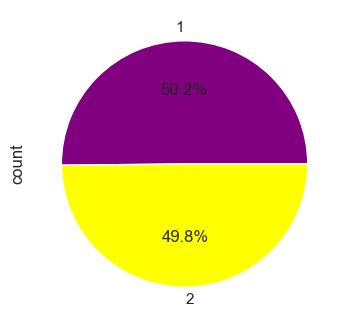

In [17]:
plt.figure(figsize=(4,4))
colors=['purple','yellow']
df.ANXIETY.value_counts().plot.pie(autopct='%1.1f%%',colors=colors)
plt.show()

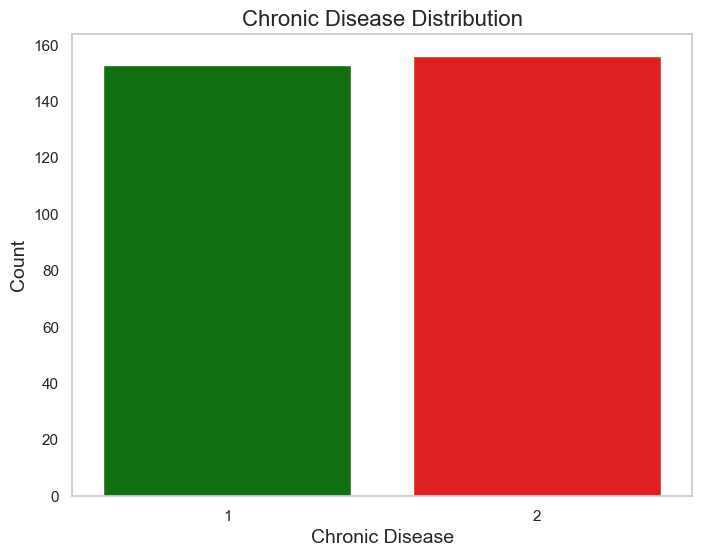

In [18]:
plt.figure(figsize=(8, 6))  # Size of the plot

# Creating a count plot for 'CHRONIC DISEASE' data with red color for 2s and green color for 1s
sns.countplot(x='CHRONIC DISEASE', data=df, palette={1: 'green', 2: 'red'})

# Adding labels to the axes and a title to the plot
plt.xlabel('Chronic Disease', fontsize=14)  # X-axis label
plt.ylabel('Count', fontsize=14)  # Y-axis label
plt.title('Chronic Disease Distribution', fontsize=16)  # Plot title

# Display the plot
plt.show()

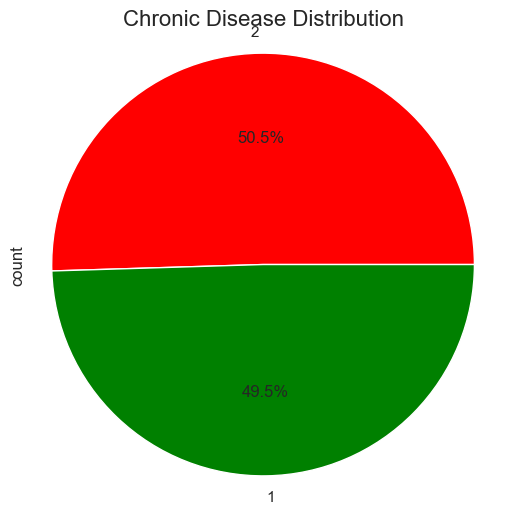

In [19]:
plt.figure(figsize=(6, 6))  # Size of the plot

# Define colors for the pie chart (red for 2, green for 1)
colors = ['red', 'green']

# Creating a pie chart for 'CHRONIC DISEASE' data with specified colors
df['CHRONIC DISEASE'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors)

# Setting the aspect ratio to be equal, ensuring the pie chart is circular
plt.axis('equal')

# Adding a title
plt.title('Chronic Disease Distribution', fontsize=16)

# Display the pie chart
plt.show()

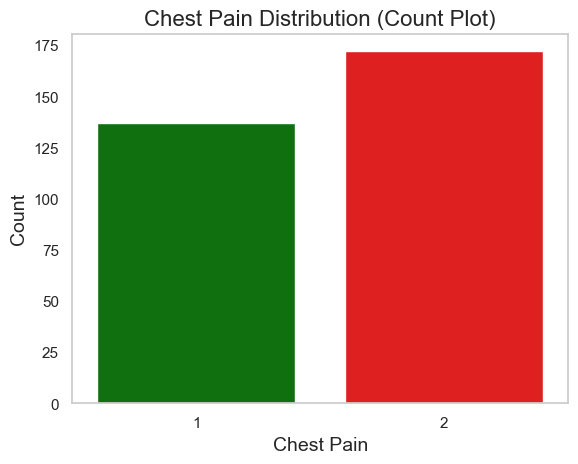

In [20]:
sns.countplot(x='CHEST PAIN', data=df, palette={1: 'green', 2: 'red'})

# Adding labels to the axes and a title to the plot
plt.xlabel('Chest Pain', fontsize=14)  # X-axis label
plt.ylabel('Count', fontsize=14)  # Y-axis label
plt.title('Chest Pain Distribution (Count Plot)', fontsize=16)  # Plot title

# Display the plot
plt.show()

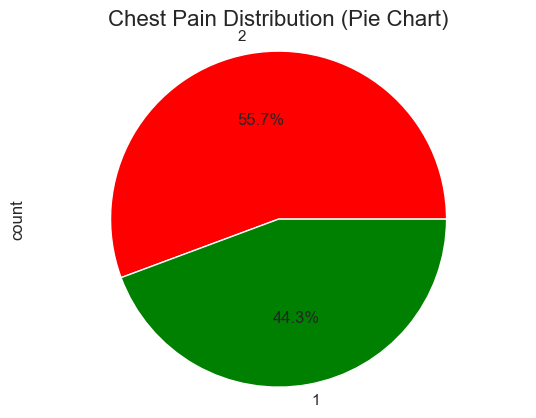

In [21]:
df['CHEST PAIN'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors)

# Setting the aspect ratio to be equal, ensuring the pie chart is circular
plt.axis('equal')

# Adding a title
plt.title('Chest Pain Distribution (Pie Chart)', fontsize=16)

# Display the pie chart
plt.show()








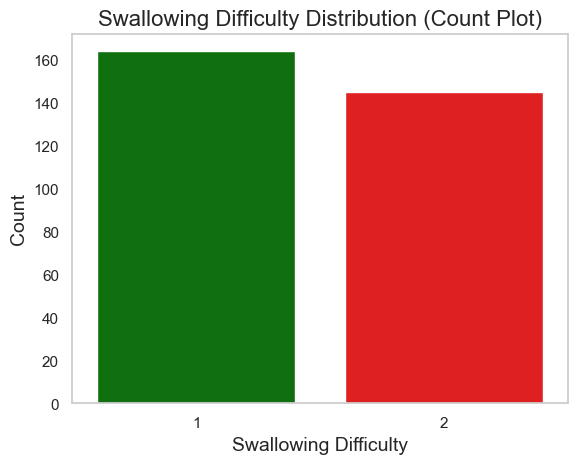

In [22]:
# Creating a count plot for 'SWALLOWING DIFFICULTY' data with red color for '2' and green color for '1'
sns.countplot(x='SWALLOWING DIFFICULTY', data=df, palette={1: 'green', 2: 'red'})

# Adding labels to the axes and a title to the plot
plt.xlabel('Swallowing Difficulty', fontsize=14)  # X-axis label
plt.ylabel('Count', fontsize=14)  # Y-axis label
plt.title('Swallowing Difficulty Distribution (Count Plot)', fontsize=16)  # Plot title

# Display the plot
plt.show()


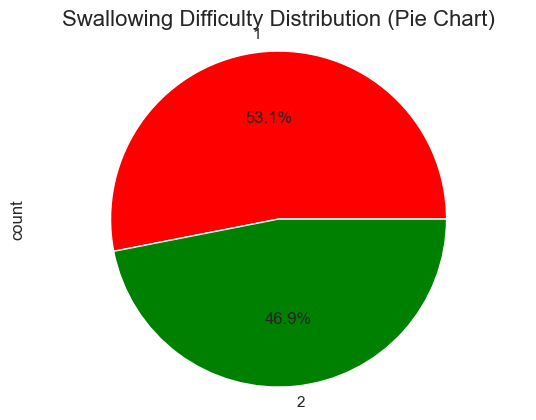

In [23]:
df['SWALLOWING DIFFICULTY'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors)

# Setting the aspect ratio to be equal, ensuring the pie chart is circular
plt.axis('equal')

# Adding a title
plt.title('Swallowing Difficulty Distribution (Pie Chart)', fontsize=16)

# Display the pie chart
plt.show()

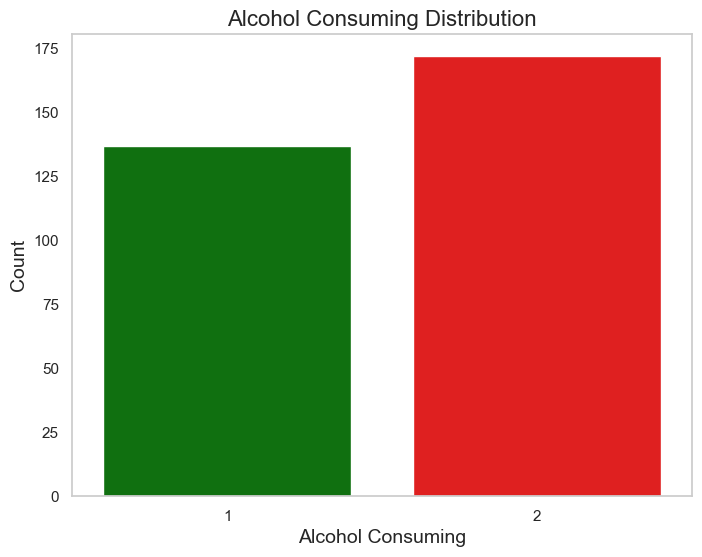

In [24]:
plt.figure(figsize=(8, 6))  # Size of the plot

# Creating a count plot for 'ALCOHOL CONSUMING' data with red color for '2' and green color for '1'
sns.countplot(x='ALCOHOL CONSUMING', data=df, palette={1: 'green', 2: 'red'})

# Adding labels to the axes and a title to the plot
plt.xlabel('Alcohol Consuming', fontsize=14)  # X-axis label
plt.ylabel('Count', fontsize=14)  # Y-axis label
plt.title('Alcohol Consuming Distribution', fontsize=16)  # Plot title

# Display the plot
plt.show()

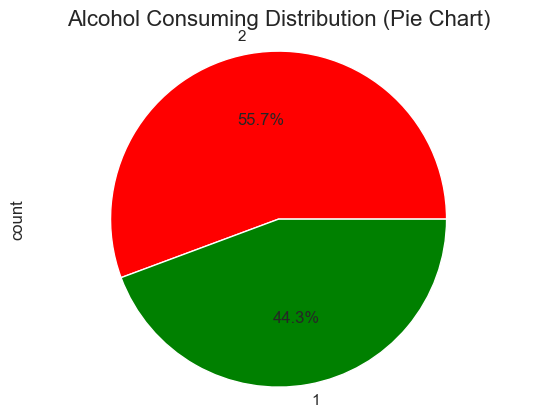

In [25]:
# Define colors for the pie chart (red for '2', green for '1')
colors = ['red', 'green']

# Creating a pie chart for 'ALCOHOL CONSUMING' data with specified colors
df['ALCOHOL CONSUMING'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors)

# Setting the aspect ratio to be equal, ensuring the pie chart is circular
plt.axis('equal')

# Adding a title
plt.title('Alcohol Consuming Distribution (Pie Chart)', fontsize=16)

# Display the pie chart
plt.show()

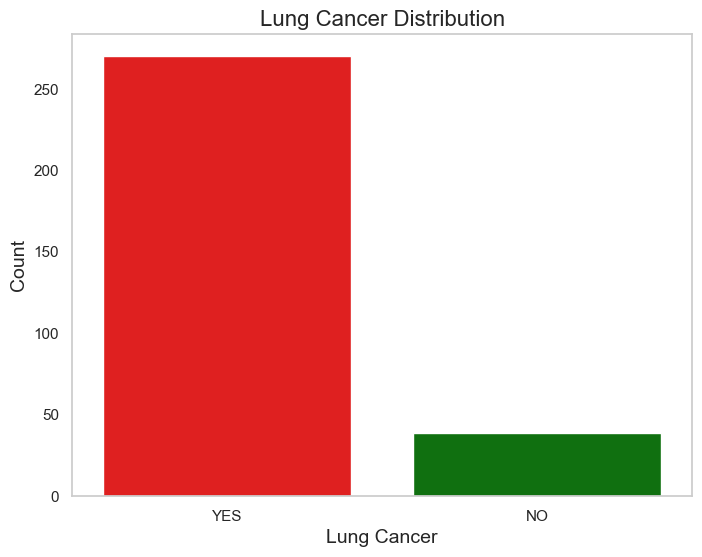

In [26]:
plt.figure(figsize=(8, 6))  # Size of the plot

# Creating a count plot for 'LUNG_CANCER' data with red color for 'yes' and green color for 'no'
sns.countplot(x='LUNG_CANCER', data=df, palette={'YES': 'red', 'NO': 'green'})

# Adding labels to the axes and a title to the plot
plt.xlabel('Lung Cancer', fontsize=14)  # X-axis label
plt.ylabel('Count', fontsize=14)  # Y-axis label
plt.title('Lung Cancer Distribution', fontsize=16)  # Plot title

# Display the plot
plt.show()

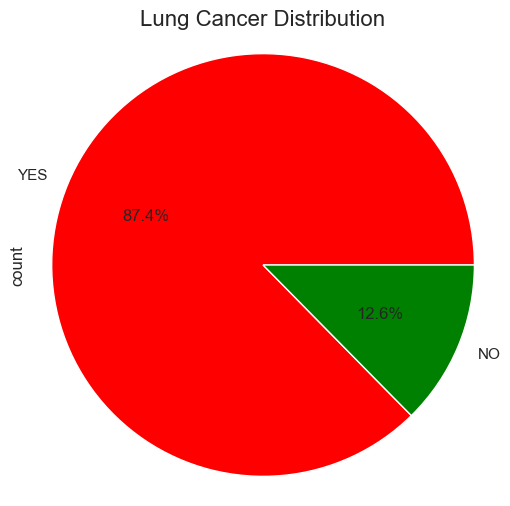

In [27]:
plt.figure(figsize=(6, 6))  # Size of the plot

# Define colors for the pie chart (red for 'YES', green for 'NO')
colors = ['red', 'green']

# Creating a pie chart for 'LUNG_CANCER' data with specified colors
df['LUNG_CANCER'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors)

# Setting the aspect ratio to be equal, ensuring the pie chart is circular
plt.axis('equal')

# Adding a title
plt.title('Lung Cancer Distribution', fontsize=16)

# Display the pie chart
plt.show()

# DATA CLEANING

In [28]:
#If so, this code is used to find and clean the missed and incorrectly contaminated data in clean.

In [29]:
# Check if data is missing
print(df.isnull().sum())

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [30]:
# Clear missing data
df = df.dropna()

In [31]:
#In order to do regression work on the data set, we replace the male and female values with numbers. This code is used for this.

# REGRESSIONS

In [32]:
label_encoder=preprocessing.LabelEncoder()
df['GENDER']= label_encoder.fit_transform (df['GENDER'])
df['LUNG_CANCER']=label_encoder.fit_transform(df['LUNG_CANCER'])
df.head()

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       1   69        1               2        2              1   
1       1   74        2               1        1              1   
2       0   59        1               1        1              2   
3       1   63        2               2        2              1   
4       0   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  LUNG_CANCER  
0                    2                      2           2            1  
1                    2                      2           2            1  
2                    2                      1           2            0  
3                    1                      2           2            0  
4                    2                      1           1            0

In [33]:
corr = df.corr()
print(corr)

                         GENDER       AGE   SMOKING  YELLOW_FINGERS   ANXIETY  \
GENDER                 1.000000  0.021306  0.036277       -0.212959 -0.152127   
AGE                    0.021306  1.000000 -0.084475        0.005205  0.053170   
SMOKING                0.036277 -0.084475  1.000000       -0.014585  0.160267   
YELLOW_FINGERS        -0.212959  0.005205 -0.014585        1.000000  0.565829   
ANXIETY               -0.152127  0.053170  0.160267        0.565829  1.000000   
PEER_PRESSURE         -0.275564  0.018685 -0.042822        0.323083  0.216841   
CHRONIC DISEASE       -0.204606 -0.012642 -0.141522        0.041122 -0.009678   
FATIGUE               -0.083560  0.012614 -0.029575       -0.118058 -0.188538   
ALLERGY                0.154251  0.027990  0.001913       -0.144300 -0.165750   
WHEEZING               0.141207  0.055011 -0.129426       -0.078515 -0.191807   
ALCOHOL CONSUMING      0.454268  0.058985 -0.050623       -0.289025 -0.165750   
COUGHING               0.133

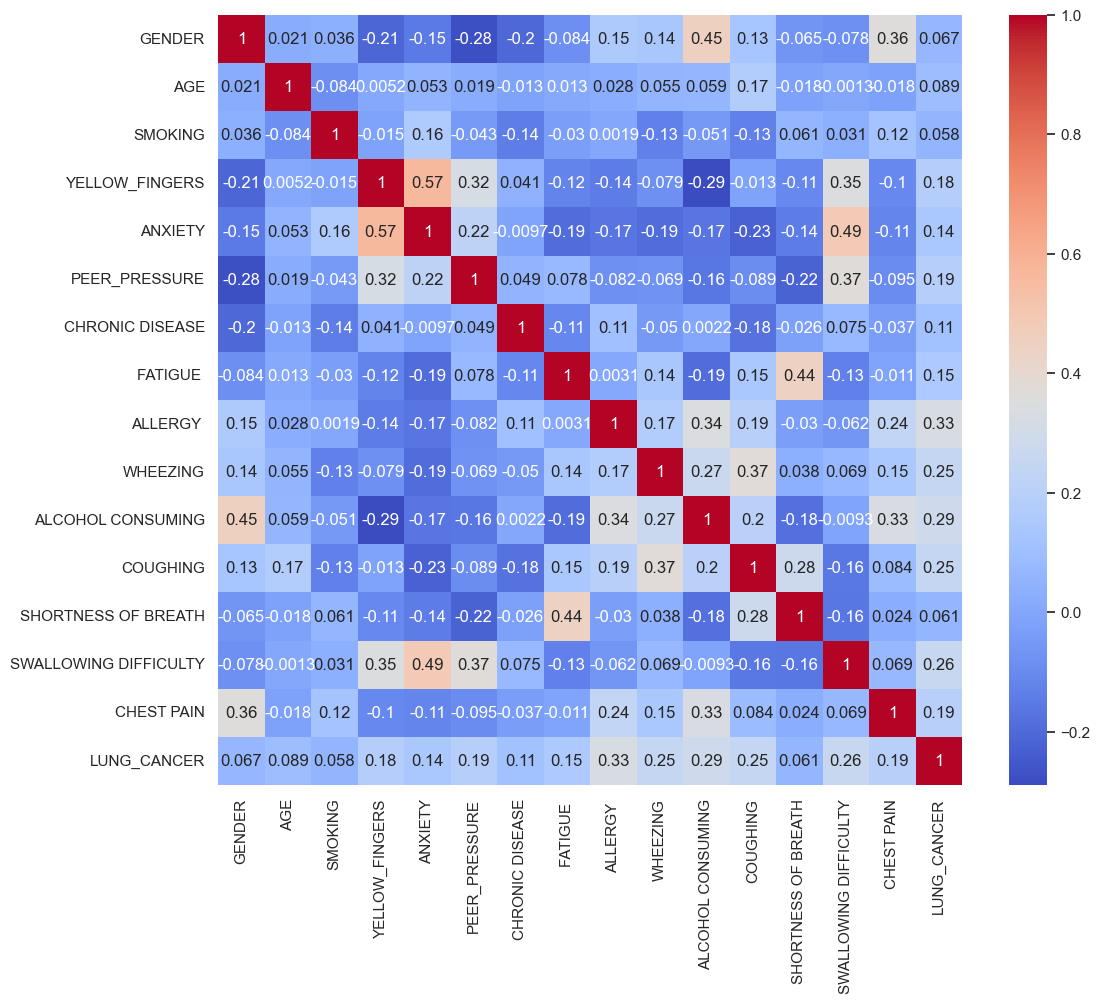

In [34]:
# Correlation distribution
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [35]:
x=df.drop(['LUNG_CANCER'], axis=1)
y=df['LUNG_CANCER']

In [36]:
x

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         1   69        1               2        2              1   
1         1   74        2               1        1              1   
2         0   59        1               1        1              2   
3         1   63        2               2        2              1   
4         0   63        1               2        1              1   
..      ...  ...      ...             ...      ...            ...   
304       0   56        1               1        1              2   
305       1   70        2               1        1              1   
306       1   58        2               1        1              1   
307       1   67        2               1        2              1   
308       1   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2         2         2         1                  1   
2                  1         2         1         2                  1   
3                  1         1         1         1                  2   
4                  1         1         1         2                  1   
..               ...       ...       ...       ...                ...   
304                2         2         1         1                  2   
305                1         2         2         2                  2   
306                1         1         2         2                  2   
307                1         2         2         1                  2   
308                1         2         2         2                  2   

     COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  
0           2                    2                      2           2  
1           1                    2                      2           2  
2           2                    2                      1           2  
3           1                    1                      2           2  
4           2                    2                      1           1  
..        ...                  ...                    ...         ...  
304         2                    2                      2           1  
305         2                    2                      1           2  
306         2                    1                      1           2  
307         2                    2                      1           2  
308         1                    1                      2           1  

[309 rows x 15 columns]

In [37]:
y

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int64

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4, random_state=42)

In [39]:
x_train

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
125       0   53        1               2        2              2   
261       1   39        2               1        1              2   
204       1   79        2               1        1              1   
304       0   56        1               1        1              2   
294       1   67        1               1        1              2   
..      ...  ...      ...             ...      ...            ...   
188       1   65        2               2        2              2   
71        0   66        2               2        2              2   
106       0   61        2               2        2              2   
270       0   70        2               1        1              1   
102       1   64        2               1        1              1   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
125                2         2         2         1                  1   
261                1         2         2         2                  2   
204                2         2         2         1                  2   
304                2         2         1         1                  2   
294                1         2         1         2                  1   
..               ...       ...       ...       ...                ...   
188                2         1         1         1                  1   
71                 1         2         1         2                  1   
106                2         2         1         1                  1   
270                1         2         1         1                  1   
102                1         2         2         2                  2   

     COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  
125         2                    2                      1           1  
261         1                    2                      1           2  
204         2                    2                      2           2  
304         2                    2                      2           1  
294         2                    2                      1           2  
..        ...                  ...                    ...         ...  
188         1                    1                      1           1  
71          2                    2                      2           1  
106         1                    2                      2           1  
270         1                    2                      1           1  
102         2                    2                      1           2  

[185 rows x 15 columns]

In [40]:
x_test

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
288       0   61        1               2        2              2   
9         1   53        2               2        2              2   
57        1   73        1               1        1              1   
60        1   70        1               2        1              2   
25        1   65        1               2        2              1   
..      ...  ...      ...             ...      ...            ...   
139       1   63        1               2        1              1   
132       0   61        2               1        1              1   
86        1   66        1               2        2              1   
260       0   59        1               2        2              2   
152       0   74        1               2        2              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
288                1         1         2         2                  1   
9                  2         1         2         1                  2   
57                 2         1         2         1                  2   
60                 2         2         2         2                  2   
25                 1         2         1         2                  2   
..               ...       ...       ...       ...                ...   
139                1         2         1         2                  2   
132                2         2         2         1                  1   
86                 2         1         2         1                  2   
260                2         2         1         2                  2   
152                2         2         1         2                  2   

     COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  
288         2                    1                      2           1  
9           1                    1                      2           2  
57          2                    2                      2           2  
60          2                    1                      2           2  
25          2                    2                      2           2  
..        ...                  ...                    ...         ...  
139         2                    2                      1           1  
132         1                    2                      1           1  
86          2                    2                      1           2  
260         1                    1                      1           1  
152         1                    1                      1           1  

[124 rows x 15 columns]

In [41]:
y_train

125    1
261    1
204    1
304    1
294    1
      ..
188    1
71     1
106    1
270    0
102    1
Name: LUNG_CANCER, Length: 185, dtype: int64

In [42]:
y_test

288    1
9      1
57     1
60     1
25     1
      ..
139    1
132    1
86     1
260    1
152    1
Name: LUNG_CANCER, Length: 124, dtype: int64

In [43]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)
cm=confusion_matrix(y_test, y_pred)
accuracy=accuracy_score(y_test, y_pred)
print(cm)
print(accuracy)

[[  1  10]
 [  1 112]]
0.9112903225806451


In [44]:
score_list=[]
for each in range (2,50) :
    knn2=KNeighborsClassifier(n_neighbors=each)
    knn2.fit(x_train, y_train)
    score_list.append(knn2.score(x_test,y_test))

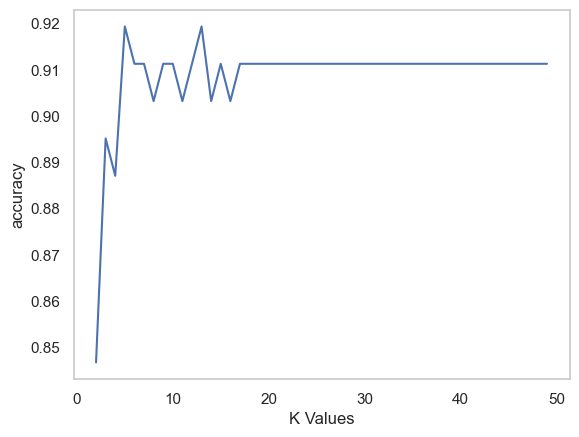

In [45]:
plt.plot(range(2,50), score_list)
plt.xlabel('K Values')
plt.ylabel('accuracy')
plt.show() # k değeri = 10

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.09      0.15        11
           1       0.92      0.99      0.95       113

    accuracy                           0.91       124
   macro avg       0.71      0.54      0.55       124
weighted avg       0.88      0.91      0.88       124



In [47]:
model=RandomForestClassifier(random_state=0)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [48]:
y_pred=model.predict(x_test)

In [49]:
accuracy=accuracy_score(y_test, y_pred)
print(accuracy)

0.9274193548387096


In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.55      0.57        11
           1       0.96      0.96      0.96       113

    accuracy                           0.93       124
   macro avg       0.78      0.76      0.77       124
weighted avg       0.92      0.93      0.93       124



In [51]:
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[  6   5]
 [  4 109]]


<Axes: >

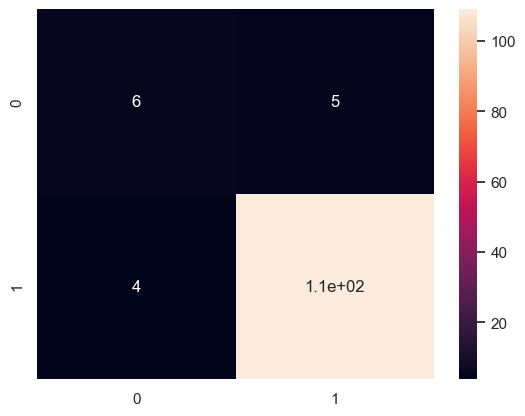

In [52]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)


In [53]:
logr=LogisticRegression(random_state=0)

In [54]:
logr.fit(x_train, y_train)
y_pred=logr.predict(x_test)
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[  5   6]
 [  1 112]]


/Users/ebubekirtilbac/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
accuracy=accuracy_score(y_test, y_pred)
print(accuracy)

0.9435483870967742


In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.45      0.59        11
           1       0.95      0.99      0.97       113

    accuracy                           0.94       124
   macro avg       0.89      0.72      0.78       124
weighted avg       0.94      0.94      0.94       124

